In [128]:
# Import necessary packages and libraries
import pandas as pd
import numpy as np

import nltk; 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/zhu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/zhu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from nltk.sentiment import SentimentIntensityAnalyzer

In [130]:
# Load Tweets Text Data
tweets= pd.read_csv('labeled_set.csv', encoding = "ISO-8859-1")
tweets.head(10)

,text,label
0,?? no sé si das más pena tú o tu terrible ort...,0
1,"Cuando todo se va al infierno, la gente que e...",0
2,"- En 1800 nace #NatTurner, el esclavo rebelde ...",0
3,entre muchas otras Muere el 6 de nov 2015 ??...,0
4,era la maldición de muchas familias.,0
5,https://t.co/I8JcEowZed #FelizLunes #FelizLun...,0
6,La rola de #LaLocaDelSenado,0
7,"oh Dios mío!, desde cuando tienen eso ?",0
8,sexistas y totalmente inadecuados para su eda...,0
9,"- Te ves bien crudo, ¿estuvo bueno el fin? - N...",0


In [131]:
#Remove empty space in columns if there is any
tweets.columns = tweets.columns.str.replace(' ', '')

In [132]:
# Rename columns 
tweets.rename(columns={'text': 'tweets'}, inplace=True)

In [133]:
# Check the data type of each column
tweets.dtypes

tweets    object
label      int64
dtype: object

In [134]:
tweets.head(5)

,tweets,label
0,?? no sé si das más pena tú o tu terrible ort...,0
1,"Cuando todo se va al infierno, la gente que e...",0
2,"- En 1800 nace #NatTurner, el esclavo rebelde ...",0
3,entre muchas otras Muere el 6 de nov 2015 ??...,0
4,era la maldición de muchas familias.,0


In [135]:
tweets['tweets'] = tweets['tweets'].str.replace('[^\w\s]', '') # Remove all special symbols & characters
tweets['tweets'] = tweets['tweets'].str.replace('_', '') # Remove all underscores
tweets['tweets'] = tweets['tweets'].str.replace('http[^\s]*',"") # Remove all words that start with "http"

/var/folders/kw/y1wfcqhd7nz_cc11ydrrc7cr0000gn/T/ipykernel_51645/3886649899.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['tweets'] = tweets['tweets'].str.replace('[^\w\s]', '') # Remove all special symbols & characters
/var/folders/kw/y1wfcqhd7nz_cc11ydrrc7cr0000gn/T/ipykernel_51645/3886649899.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['tweets'] = tweets['tweets'].str.replace('http[^\s]*',"") # Remove all words that start with "http"


In [136]:
# tweets data transformation
tweets['tweets'] = tweets['tweets'].astype(str).str.lower() # Make all words in lower case
tweets.head(20)

,tweets,label
0,no sé si das más pena tú o tu terrible ortog...,0
1,cuando todo se va al infierno la gente que es...,0
2,en 1800 nace natturner el esclavo rebelde del...,0
3,entre muchas otras muere el 6 de nov 2015,0
4,era la maldición de muchas familias,0
5,felizlunes felizlunesatodos linux linuxsecur...,0
6,la rola de lalocadelsenado,0
7,oh dios mío desde cuando tienen eso,0
8,sexistas y totalmente inadecuados para su eda...,0
9,te ves bien crudo estuvo bueno el fin no es ...,0


In [137]:
tweets.to_csv('cleaned_tweets.csv')
tweets.to_html('cleaned_tweets.html', classes='table table-stripped')

In [138]:
# Tokenization
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

tweets['tweets_token']=tweets['tweets'].apply(regexp.tokenize)
tweets.head(10)

,tweets,label,tweets_token
0,no sé si das más pena tú o tu terrible ortog...,0,"[no, sé, si, das, más, pena, tú, o, tu, terrib..."
1,cuando todo se va al infierno la gente que es...,0,"[cuando, todo, se, va, al, infierno, la, gente..."
2,en 1800 nace natturner el esclavo rebelde del...,0,"[en, 1800, nace, natturner, el, esclavo, rebel..."
3,entre muchas otras muere el 6 de nov 2015,0,"[entre, muchas, otras, muere, el, 6, de, nov, ..."
4,era la maldición de muchas familias,0,"[era, la, maldición, de, muchas, familias]"
5,felizlunes felizlunesatodos linux linuxsecur...,0,"[felizlunes, felizlunesatodos, linux, linuxsec..."
6,la rola de lalocadelsenado,0,"[la, rola, de, lalocadelsenado]"
7,oh dios mío desde cuando tienen eso,0,"[oh, dios, mío, desde, cuando, tienen, eso]"
8,sexistas y totalmente inadecuados para su eda...,0,"[sexistas, y, totalmente, inadecuados, para, s..."
9,te ves bien crudo estuvo bueno el fin no es ...,0,"[te, ves, bien, crudo, estuvo, bueno, el, fin,..."


In [139]:
# nltk.download('stopwords') #To get rid of stop words
# from nltk.corpus import stopwords
# # Make a list of spanish stopwords
# stopwords = nltk.corpus.stopwords.words("spanish")

In [140]:
# Remove infrequent words
# We first change the format of tweets_token to strings and keep only words which are no shorter than 2 letters
tweets['tweets_string'] = tweets['tweets_token'].apply(lambda x: ' '.join([item for item in x if len(item)>=2]))
tweets.head(10)

,tweets,label,tweets_token,tweets_string
0,no sé si das más pena tú o tu terrible ortog...,0,"[no, sé, si, das, más, pena, tú, o, tu, terrib...",no sé si das más pena tú tu terrible ortografí...
1,cuando todo se va al infierno la gente que es...,0,"[cuando, todo, se, va, al, infierno, la, gente...",cuando todo se va al infierno la gente que est...
2,en 1800 nace natturner el esclavo rebelde del...,0,"[en, 1800, nace, natturner, el, esclavo, rebel...",en 1800 nace natturner el esclavo rebelde del ...
3,entre muchas otras muere el 6 de nov 2015,0,"[entre, muchas, otras, muere, el, 6, de, nov, ...",entre muchas otras muere el de nov 2015
4,era la maldición de muchas familias,0,"[era, la, maldición, de, muchas, familias]",era la maldición de muchas familias
5,felizlunes felizlunesatodos linux linuxsecur...,0,"[felizlunes, felizlunesatodos, linux, linuxsec...",felizlunes felizlunesatodos linux linuxsecurit...
6,la rola de lalocadelsenado,0,"[la, rola, de, lalocadelsenado]",la rola de lalocadelsenado
7,oh dios mío desde cuando tienen eso,0,"[oh, dios, mío, desde, cuando, tienen, eso]",oh dios mío desde cuando tienen eso
8,sexistas y totalmente inadecuados para su eda...,0,"[sexistas, y, totalmente, inadecuados, para, s...",sexistas totalmente inadecuados para su edad e...
9,te ves bien crudo estuvo bueno el fin no es ...,0,"[te, ves, bien, crudo, estuvo, bueno, el, fin,...",te ves bien crudo estuvo bueno el fin no es qu...


In [141]:
# Create a list of all words
all_words = ' '.join([word for word in tweets['tweets_string']])

In [142]:
# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [143]:
# Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'que': 5199, 'la': 4773, 'de': 4715, 'no': 3236, 'el': 2861, 'es': 2462, 'en': 1967, 'una': 1720, 'las': 1680, 'se': 1599, ...})

In [144]:
# Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
tweets['tweets_string_fdist'] = tweets['tweets_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 4 ]))
tweets.head(10)

,tweets,label,tweets_token,tweets_string,tweets_string_fdist
0,no sé si das más pena tú o tu terrible ortog...,0,"[no, sé, si, das, más, pena, tú, o, tu, terrib...",no sé si das más pena tú tu terrible ortografí...,no sé si das más pena tú tu terrible pinche naca
1,cuando todo se va al infierno la gente que es...,0,"[cuando, todo, se, va, al, infierno, la, gente...",cuando todo se va al infierno la gente que est...,cuando todo se va al infierno la gente que est...
2,en 1800 nace natturner el esclavo rebelde del...,0,"[en, 1800, nace, natturner, el, esclavo, rebel...",en 1800 nace natturner el esclavo rebelde del ...,en nace el esclavo del de
3,entre muchas otras muere el 6 de nov 2015,0,"[entre, muchas, otras, muere, el, 6, de, nov, ...",entre muchas otras muere el de nov 2015,entre muchas otras el de
4,era la maldición de muchas familias,0,"[era, la, maldición, de, muchas, familias]",era la maldición de muchas familias,era la de muchas familias
5,felizlunes felizlunesatodos linux linuxsecur...,0,"[felizlunes, felizlunesatodos, linux, linuxsec...",felizlunes felizlunesatodos linux linuxsecurit...,
6,la rola de lalocadelsenado,0,"[la, rola, de, lalocadelsenado]",la rola de lalocadelsenado,la de
7,oh dios mío desde cuando tienen eso,0,"[oh, dios, mío, desde, cuando, tienen, eso]",oh dios mío desde cuando tienen eso,oh dios mío desde cuando tienen eso
8,sexistas y totalmente inadecuados para su eda...,0,"[sexistas, y, totalmente, inadecuados, para, s...",sexistas totalmente inadecuados para su edad e...,totalmente para su edad esto no es feminista l...
9,te ves bien crudo estuvo bueno el fin no es ...,0,"[te, ves, bien, crudo, estuvo, bueno, el, fin,...",te ves bien crudo estuvo bueno el fin no es qu...,te ves bien crudo estuvo bueno el fin no es qu...


In [145]:
# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/zhu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/zhu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [146]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
tweets['tweets_string_lem'] = tweets['tweets_string_fdist'].apply(wordnet_lem.lemmatize)

In [147]:
# check if the columns are equal so we might not need to do the lemmatization
tweets['is_equal']= (tweets['tweets_string_fdist']==tweets['tweets_string_lem'])

In [148]:
# show level count
tweets.is_equal.value_counts()

True     10025
False        4
Name: is_equal, dtype: int64

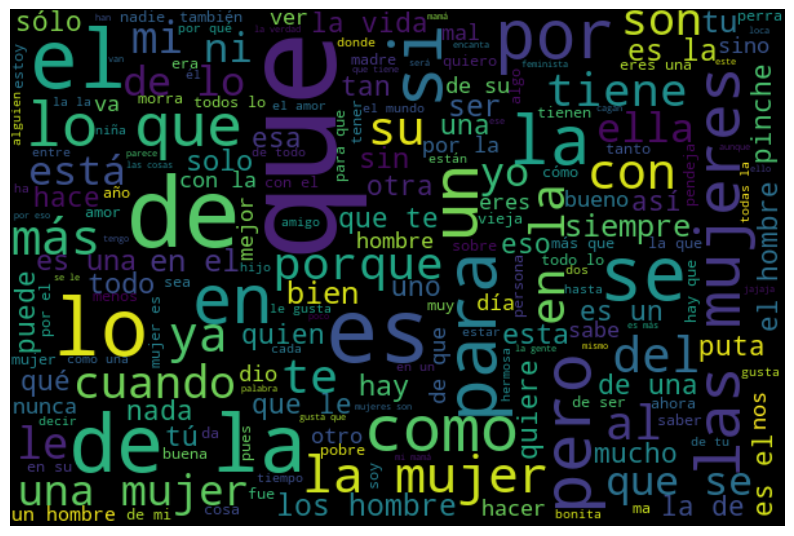

In [149]:
# Let's create a word cloud
all_words_lem = ' '.join([word for word in tweets['tweets_string_lem']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

wordcloud.to_file('college_wordcloud.png')

In [150]:
# Frequency distributions
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/zhu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [152]:
# most common words
fd.most_common(30)

[('que', 5199),
 ('la', 4776),
 ('de', 4715),
 ('no', 3236),
 ('el', 2861),
 ('es', 2462),
 ('en', 1967),
 ('una', 1720),
 ('las', 1677),
 ('se', 1599),
 ('los', 1488),
 ('me', 1357),
 ('un', 1322),
 ('lo', 1258),
 ('por', 1167),
 ('mujer', 1149),
 ('te', 1144),
 ('con', 1031),
 ('para', 1007),
 ('si', 872),
 ('más', 844),
 ('como', 789),
 ('su', 702),
 ('mujeres', 664),
 ('pero', 648),
 ('ser', 628),
 ('mi', 625),
 ('del', 594),
 ('tu', 593),
 ('le', 576)]

In [153]:
fd.tabulate(30)

    que      la      de      no      el      es      en     una     las      se     los      me      un      lo     por   mujer      te     con    para      si     más    como      su mujeres    pero     ser      mi     del      tu      le 
   5199    4776    4715    3236    2861    2462    1967    1720    1677    1599    1488    1357    1322    1258    1167    1149    1144    1031    1007     872     844     789     702     664     648     628     625     594     593     576 


In [154]:
# Plot common words
# Obtain top 15 words
top_30 = fd.most_common(30)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_30))

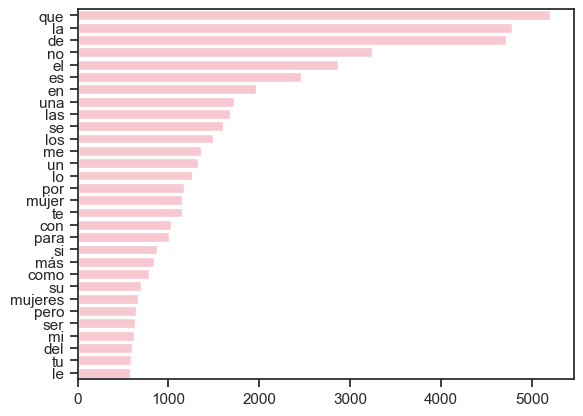

In [155]:
import seaborn as sns
sns.set_theme(style="ticks")

tweets_top30_word_barplot = sns.barplot(y=fdist.index, x=fdist.values, color='pink')
tweets_top30_word_barplot.figure.savefig("tweets_top30_word_barplot.png")